In [1]:
import pickle
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import ast
from sklearn.model_selection import train_test_split

In [2]:
with open("keypoint_data.txt","r") as myfile:
    data = myfile.read()
    data = data.split("\n")

X = []
Y = []
label_to_no = {"tree": 0, "warrior1":1, "warrior2":2, "childs":3,"downwarddog":4,"plank":5,"mountain":6,"trianglepose":7}
no_to_label = {0: "tree", 1: "warrior1", 2:"warrior2"}
for line in data:
    if line != "":
        line = line.split(":")
        X.append(ast.literal_eval(line[1]))
        Y.append(label_to_no[line[0]])

In [3]:
X

[[0.2604166666666667,
  0.5555555699235302,
  0.25,
  0.5833333548852953,
  0.25,
  0.5277777849617651,
  0.25,
  0.6111111398470603,
  0.23958333333333334,
  0.48611110751911746,
  0.34375,
  0.625,
  0.3229166666666667,
  0.4583333225573524,
  0.21875,
  0.6944444300764698,
  0.21875,
  0.4166666774426476,
  0.125,
  0.5972222150382349,
  0.125,
  0.5277777849617651,
  0.5625,
  0.5416666774426476,
  0.5208333333333334,
  0.43055556992353017,
  0.7291666666666666,
  0.5277777849617651,
  0.5729166666666666,
  0.2777777849617651,
  0.9166666666666666,
  0.5,
  0.6770833333333334,
  0.43055556992353017],
 [0.16666666303362165,
  0.4861111052139946,
  0.15625,
  0.5,
  0.15625,
  0.4861111052139946,
  0.16666666303362165,
  0.5277777895720108,
  0.15625,
  0.4722222104279891,
  0.25,
  0.5277777895720108,
  0.25,
  0.4444444473930027,
  0.375,
  0.5555555791440218,
  0.3645833260672433,
  0.4305555526069973,
  0.2916666739327567,
  0.4861111052139946,
  0.3229166739327567,
  0.486111105

In [4]:
Y

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,


In [5]:
len(X)

569

In [6]:
len(Y)

569

In [7]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=500, criterion="entropy", random_state=0)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42, shuffle=True)

In [9]:
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=500, random_state=0)

In [10]:
y_pred = rfc.predict(X_test)

In [11]:
from sklearn.metrics import accuracy_score as acc
acc(y_pred, y_test)

0.898936170212766

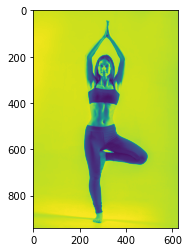

In [12]:
import matplotlib.pyplot as plt
import cv2
img_tree = "./sampleposes/tree.jpg"
image = cv2.imread(img_tree)
img_array = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(img_array)
plt.show()

In [13]:
img_array.shape

(939, 626)

In [14]:
import pickle

In [16]:
pickle.dump(rfc, open('rfc_model.pkl', 'wb'))